<a href="https://colab.research.google.com/github/Pavankalyan2006/AD-/blob/master/5_2_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Cars.csv to Cars (1).csv
   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149
R-squared: 0.6749527236507018
Adjusted R-squared: 0.5666036315342691
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        06:43:24   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489

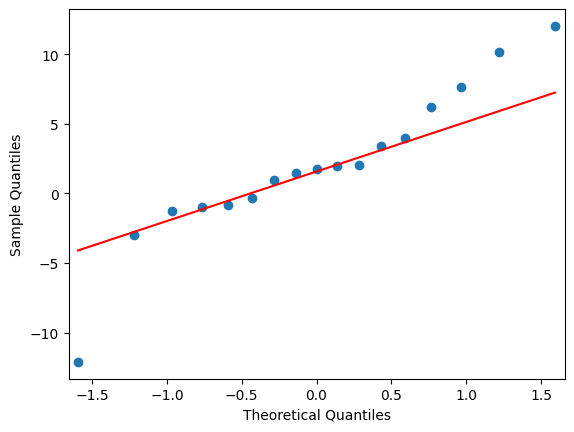

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

print(df.head())

X = df.drop('MPG', axis=1)  # Independent variables
y = df['MPG']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute R-squared
r2 = r2_score(y_test, y_pred)

# Compute Adjusted R-squared
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

# Using statsmodels for more detailed summary
X = sm.add_constant(X)  # Add intercept term
model_stats = sm.OLS(y, X).fit()

# Print model summary
print(model_stats.summary())

# Extract R-squared and Adjusted R-squared from statsmodels
r2_statsmodel = model_stats.rsquared
adjusted_r2_statsmodel = model_stats.rsquared_adj

print(f"R-squared (Statsmodels): {r2_statsmodel}")
print(f"Adjusted R-squared (Statsmodels): {adjusted_r2_statsmodel}")

# Calculate Variance Inflation Factor (VIF)
hp_model = smf.ols("HP ~ WT", data=df).fit()
hp_r2 = hp_model.rsquared
vif = 1 / (1 - hp_r2)
print(f"VIF: {vif}")


residuals = y_test - y_pred


sm.qqplot(residuals, line="q")
plt.show()


In [ ]:
# residual means the difference between actual value and prediction point

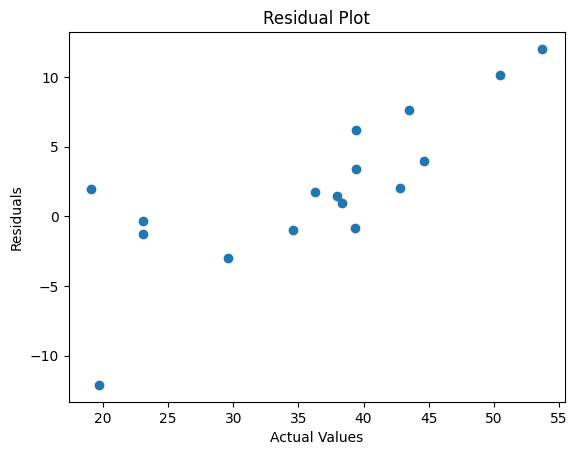

In [ ]:
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Saving Cars.csv to Cars (2).csv
   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149
R-squared: 0.6749527236507018
Adjusted R-squared: 0.5666036315342691


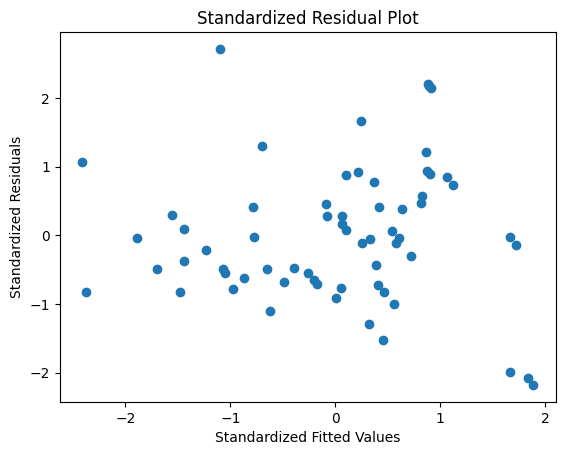

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from google.colab import files

# Upload file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Read the dataset
df = pd.read_csv(file_name)

# Preview data
print(df.head())

# Independent and dependent variables
X = df.drop('MPG', axis=1)  # Independent variables
y = df['MPG']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute R-squared
r2 = r2_score(y_test, y_pred)

# Compute Adjusted R-squared
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

# Standardize function
def get_s(vals):
    return (vals - vals.mean()) / vals.std()

# Calculate fitted values and residuals using the LinearRegression model
fitted_values = model.predict(X_train)
residuals = y_train - fitted_values

# Standardize the fitted values and residuals
fitted_values_standardized = get_s(fitted_values)
residuals_standardized = get_s(residuals)

# Scatter plot of standardized fitted values vs standardized residuals
plt.scatter(fitted_values_standardized, residuals_standardized)
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residual Plot")
plt.show()


In [ ]:
# In statistics, a "residual" is the difference between the actual value of a dependent variable and the value predicted by a regression model, essentially representing how far a data point lies from the regression line, while "regression" refers to a statistical method used to analyze the relationship between a dependent variable and one or more independent variables, aiming to find the best-fit line that minimizes the sum of squared residuals across all data points.

Saving Cars.csv to Cars (5).csv
   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149


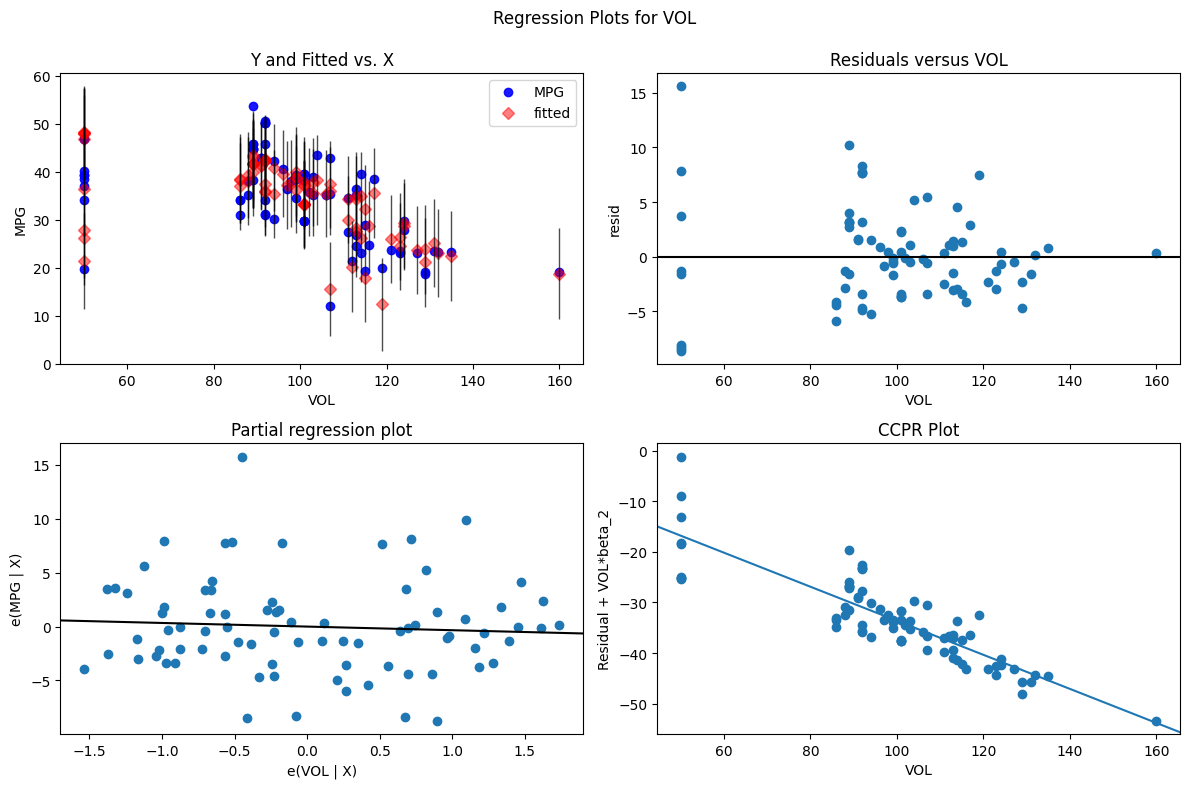

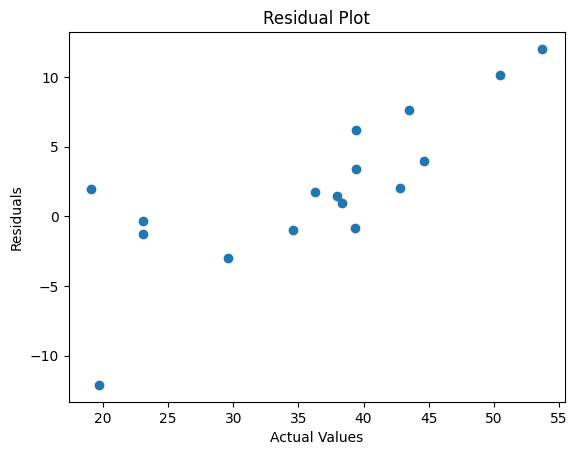

In [ ]:
# prompt: plot the grapgh of residual and regressor plot
#  with VOL is sm.graphics.plot-regressor_exgo()

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from google.colab import files
import matplotlib.pyplot as plt

# Upload file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Read the dataset
df = pd.read_csv(file_name)

# Preview data
print(df.head())

# Independent and dependent variables
X = df.drop('MPG', axis=1)  # Independent variables
y = df['MPG']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
residuals = y_test - y_pred

#regressor plot with VOL
fig = sm.graphics.plot_regress_exog(model_stats, "VOL", fig=plt.figure(figsize=(12, 8)))
plt.show()
# residual means the difference between actual value and prediction point
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Saving Cars.csv to Cars (7).csv
   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149


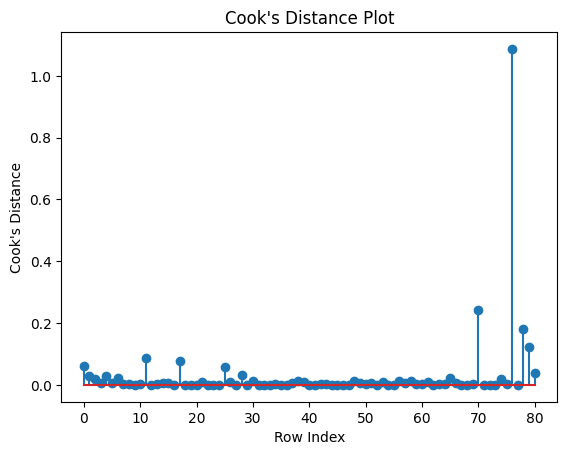

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

print(df.head())

X = df.drop('MPG', axis=1)
y = df['MPG']

X_with_intercept = sm.add_constant(X)

model_stats = sm.OLS(y, X_with_intercept).fit()

model_influence = model_stats.get_influence()
(cooks_d, _) = model_influence.cooks_distance

plt.stem(np.arange(len(X)), np.round(cooks_d, 3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()


# This code helps us find out if any data points are significantly affecting our regression model.

# Cook's Distance tells us which data points are "influential"—meaning they have a big impact on the results of the model.
# The plot shows these influential points. If a point has a large Cook's Distance, it might be an outlier or could be distorting the model’s predictions.

In [ ]:
# prompt: df[df.index.isin(70,75)]

import pandas as pd

# Assuming df is already defined and loaded with data as in your provided code

# Filter the DataFrame to select rows with index values 70 and 75
filtered_df = df[df.index.isin([70, 75])]

# Print the filtered DataFrame
filtered_df


,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
75,175,18.762837,129,132.864163,42.778219


In [ ]:
# prompt: Using dataframe filtered_df: drop the values in cras datat the 70 and 75 then find the r2 square value

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a sample DataFrame (replace with your actual data loading)
data = {'HP': [175, 280, 70, 75, 100,120],
        'MPG': [18.76283667, 19.67850666, 20, 22,23,24],
        'VOL': [129, 50, 80, 90,100,110],
        'SP': [132.864163, 164.5985128, 120,130,140,150],
        'WT': [42.77821864, 15.82306042, 25,26,27,28]}
cras = pd.DataFrame(data)

# Drop rows where 'HP' is 70 or 75
cras_filtered = cras[~cras['HP'].isin([70, 75])]

# Define features (X) and target (y)
X = cras_filtered[['HP', 'VOL', 'SP', 'WT']]
y = cras_filtered['MPG']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

r2


1.0